# Problem Statement:

 The goal of this project is to analyze the provided dataset, perform Exploratory Data Analysis
 (EDA)to uncover insights, and build a linear regression model to predict the number of calories
 burnt during a workout session

### Dataset
##### The dataset contains the following columns:- User_ID: Unique identifier for each user.
##### - Gender: Gender of the user (Male or Female).- Age: Age of the user (in years).
##### - Height: Height of the user (in cm).
##### - Weight: Weight of the user (in kg).
##### -Duration: Duration of the workout session (in minutes).
##### - Heart_Rate: Average heart rate during the workout session (in bpm).
##### - Body_Temp: Average body temperature during the workout session (in °C).
##### - Calories: Calories burnt during the workout session (target variable).

In [34]:
 # import libraries
 import pandas as pd
 import numpy as np

In [35]:
file_path = 'C:/Users/Abdoulie Balisa/OneDrive/Desktop/Axia/Exercise.csv'
df = pd.read_csv(file_path)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [36]:
print(df.dtypes)

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object


## Data Understanding

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


#### Dataset Overview:
##### - 15,000 entries with no missing values.
##### - 9 columns: 7 integers, 1 float, and 1 categorical (Gender).
##### - User_ID is an identifier and may not be needed for analysis.
##### - Gender is stored as an object and may require encoding.
##### - Body_Temp is the only float column, likely due to decimal values.
##### - Dataset size is ~1MB, making it easy to process.
##### - Possible feature engineering: BMI, age groups, etc.


In [38]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Comment: No Missing Values found

In [39]:
df.drop_duplicates(inplace=True)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


In [40]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})  
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193,86,11,92,40.4,45
14996,17212577,1,27,165,65,6,85,39.2,23
14997,17271188,1,43,159,58,16,90,40.1,75
14998,18643037,0,78,193,97,2,84,38.3,11


In [41]:
print(df.dtypes)

User_ID         int64
Gender          int64
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object


In [42]:
df.Calories.unique()

array([231,  66,  26,  71,  35, 123, 112, 143, 134,  72,   3,  92,  58,
        88,   7, 170,  11,  43,  15,  74,  29,  32,  10, 155,  24,  12,
       195,   5,  69, 136,  80, 107, 200,  56,  50, 100,   4,  70, 127,
       197, 113,  82, 141,  30,  37, 147,   8, 159,  93, 173,  89,  31,
        94,  49,  54, 117,  99,  45, 166, 202, 199,  25,  23,   6, 188,
       103, 128, 130,  27, 185,  57,  65,  91, 120,  39,  77,  42,  41,
        59, 179,  13, 180, 101, 150, 247,  18, 207, 189,  60, 186, 178,
       122, 158,  86, 182,  52, 236, 114,  64, 171,  19, 144, 149,  78,
        20,  17, 115, 119, 168,  44, 192,  96, 135, 239,  46, 190,  48,
        95, 196,   9, 105, 111, 108,  67,  62, 172,  84, 132, 167,  28,
       157, 133, 145, 174,  34, 193, 161,  85,  90, 176,  51,  22, 212,
       201,  83,  87, 221, 257, 169,  21, 156, 140,  79,  16, 137,  76,
       187, 109, 204,  36, 151, 138, 116, 110, 163,  38, 104, 183, 152,
       223, 181, 216,  68, 129, 121, 126,  63, 215, 160, 154, 12

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Gender,15000.0,5.035333e-01,5.000042e-01,0.0,0.00,1.0,1.00,1.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


# Data Insights: Discrepancies, Relationships, and Observations  

##### 1. Discrepancies (Potential Issues)  
##### - Height Outliers: Minimum height is 123 cm, and the maximum is 222 cm, which may include errors or rare extreme values.  
##### - Weight Variability: The range (36 kg to 132 kg) is reasonable, but there might be outliers that need investigation.  
##### - Calories Distribution: Wide range (1 to 314 kcal), indicating some very low or very high values that could be worth checking.  
##### - Exercise Duration: Some users exercised for only 1 minute, which might not be significant for calorie burning.  

##### 2. Relationships (Possible Correlations to Explore)  
##### - Duration vs. Calories: Longer workout sessions generally lead to higher calories burned, but other factors like weight and intensity matter.  
##### - Heart Rate vs. Calories: Higher heart rates may indicate more intense workouts, leading to more calories burned.  
##### - Weight vs. Calories: Heavier individuals might burn more calories for the same exercise duration due to higher energy expenditure.  
##### - Age vs. Heart Rate: Older individuals may have different heart rate patterns compared to younger ones.  

##### 3. Similarities (Consistent Patterns)  
##### - Body Temperature: Most values are around 40°C, indicating a stable pattern in body temp changes during exercise.  
##### - Heart Rate: Most values range between 88 and 103 bpm, suggesting a general trend in heart activity during workouts.  

##### 4. Differences (Unusual Variations)  
##### - Age Groups: Users range from 20 to 79 years, leading to differences in fitness levels and exercise performance.  
##### - Calorie Burn Variation: Some people burn very few calories despite exercise, which might be due to lower intensity or metabolic differences.  

##### Next Steps:  
##### - Investigate potential outliers in height, weight, and calorie data.  
##### - Perform correlation analysis to confirm relationships between variables.  
##### - Consider normalizing/standardizing certain features for better comparison.  


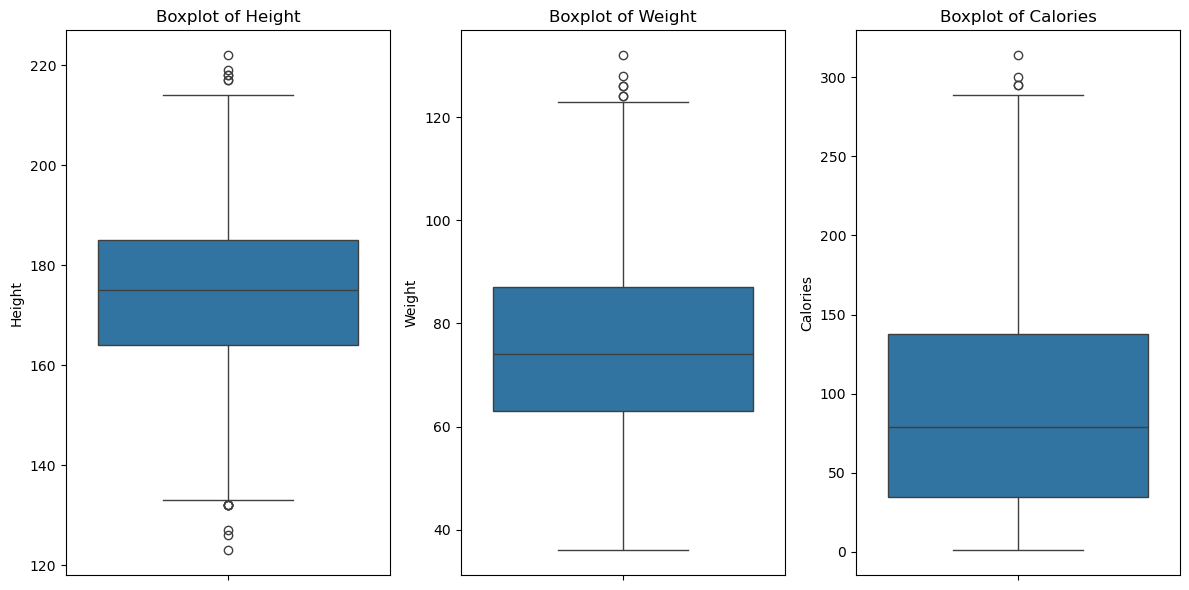

Number of outliers per feature:
 Height      14
Weight       6
Calories     4
dtype: int64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
num_cols = ['Height', 'Weight', 'Calories']

# Create boxplots for each column
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Detect outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))
print("Number of outliers per feature:\n", outliers.sum())


## Outlier Analysis Comment
##### The dataset contains a few outliers in Height, Weight, and Calories, which may indicate exceptional cases or potential data anomalies.
### Breakdown of Outliers:
##### Height (14 outliers): Some individuals have significantly higher or lower heights than the typical range. These may represent unusually short or tall individuals.
##### Weight (6 outliers): A few individuals have extreme weights, which could be due to variations in body composition or measurement errors.
##### Calories (4 outliers): There are some cases where calorie expenditure is either very high or very low, possibly due to extreme workout durations, metabolic differences, or data inconsistencies.

In [45]:
# Define numerical columns to check for outliers
num_cols = ['Height', 'Weight', 'Calories']

# Detect outliers using the IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = df[(df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))]

# Display number of outliers per column
print("Number of outliers per feature:\n", outliers.count())


Number of outliers per feature:
 User_ID        0
Gender         0
Age            0
Height        14
Weight         6
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       4
dtype: int64


In [46]:
# Remove outliers beyond the IQR range
df_r = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_r

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193,86,11,92,40.4,45
14996,17212577,1,27,165,65,6,85,39.2,23
14997,17271188,1,43,159,58,16,90,40.1,75
14998,18643037,0,78,193,97,2,84,38.3,11


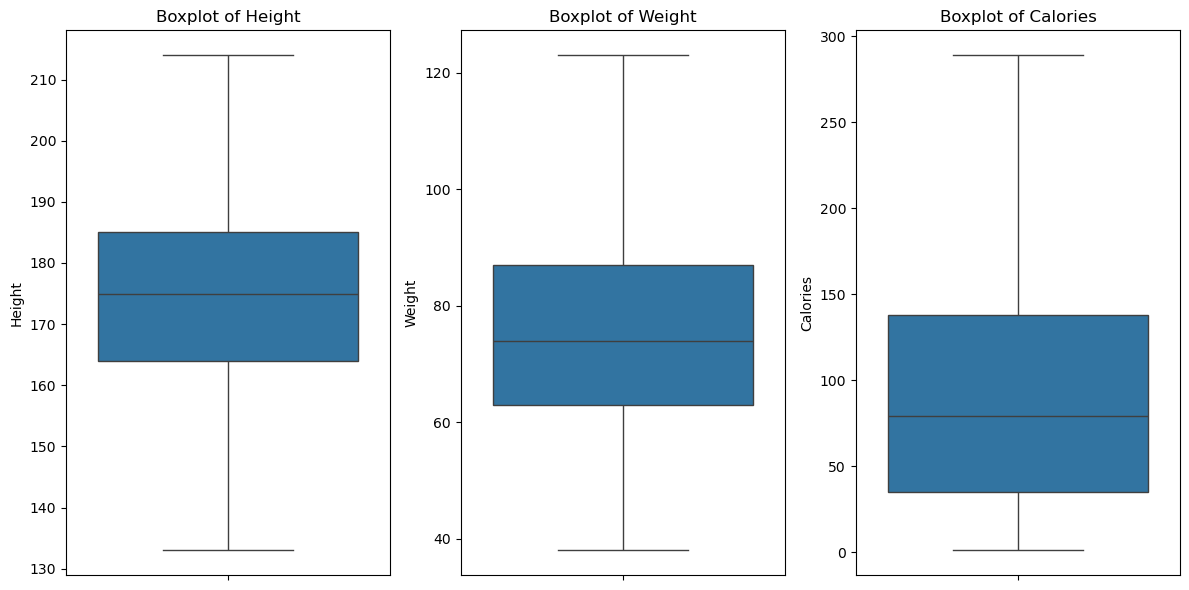

Number of outliers per feature:
 Height      0
Weight      0
Calories    0
dtype: int64


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
num_cols = ['Height', 'Weight', 'Calories']

# Create boxplots for each column
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_r[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Detect outliers using IQR method
Q1 = df_r[num_cols].quantile(0.25)
Q3 = df_r[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outliers = ((df_r[num_cols] < (Q1 - 1.5 * IQR)) | (df_r[num_cols] > (Q3 + 1.5 * IQR)))
print("Number of outliers per feature:\n", outliers.sum())

## NO Outliers Now

## Correlation Analysis:
#### - To find the correlation, first convert non numerical columns to numeral or drop them for correlation analysis by selecting ony the float and int64.

In [48]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [49]:
df_numeric.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26


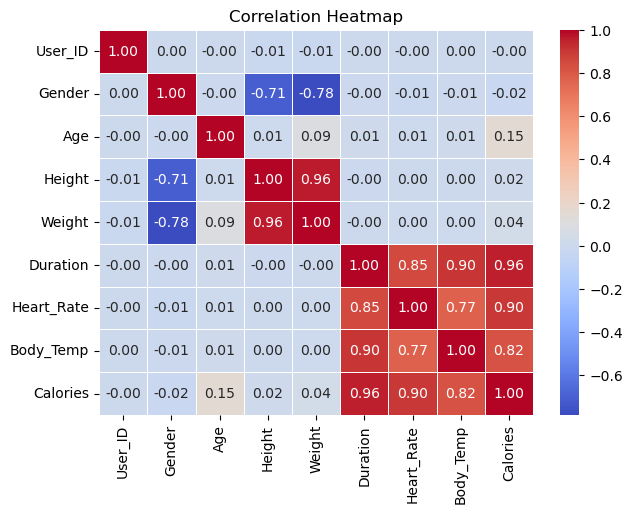

In [50]:
# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Key Insights:

   #### A strong correlation between Duration and Calories would confirm that longer workouts burn more calories.
   ##### A strong correlation between Heart Rate and Calories might indicate that intensity impacts calorie burn.
   ###### A strong correlation with body temperature suggests that it may significantly influence calorie burning, with higher body temperatures potentially increasing metabolic activity and energy expenditure..

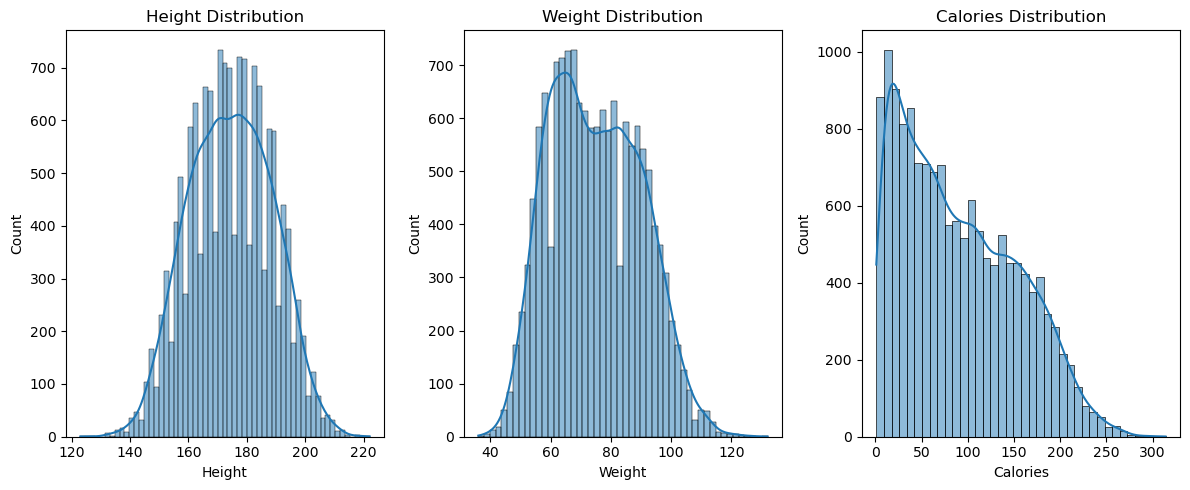

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms with density plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Calories'], kde=True)
plt.title('Calories Distribution')

plt.tight_layout()
plt.show()



## With Outliers

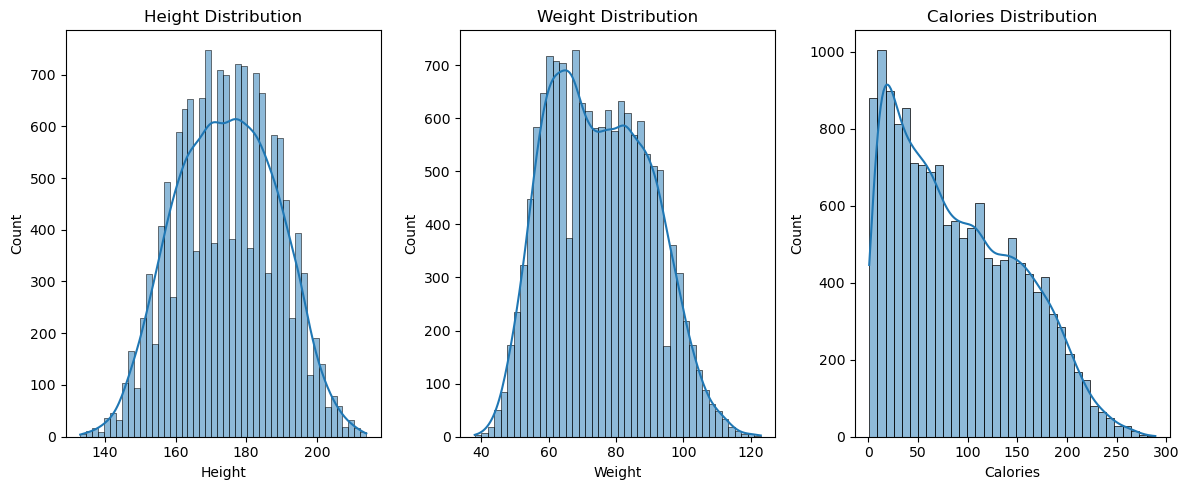

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histograms with density plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_r['Height'], kde=True)
plt.title('Height Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_r['Weight'], kde=True)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_r['Calories'], kde=True)
plt.title('Calories Distribution')

plt.tight_layout()
plt.show()


## Without Outliers

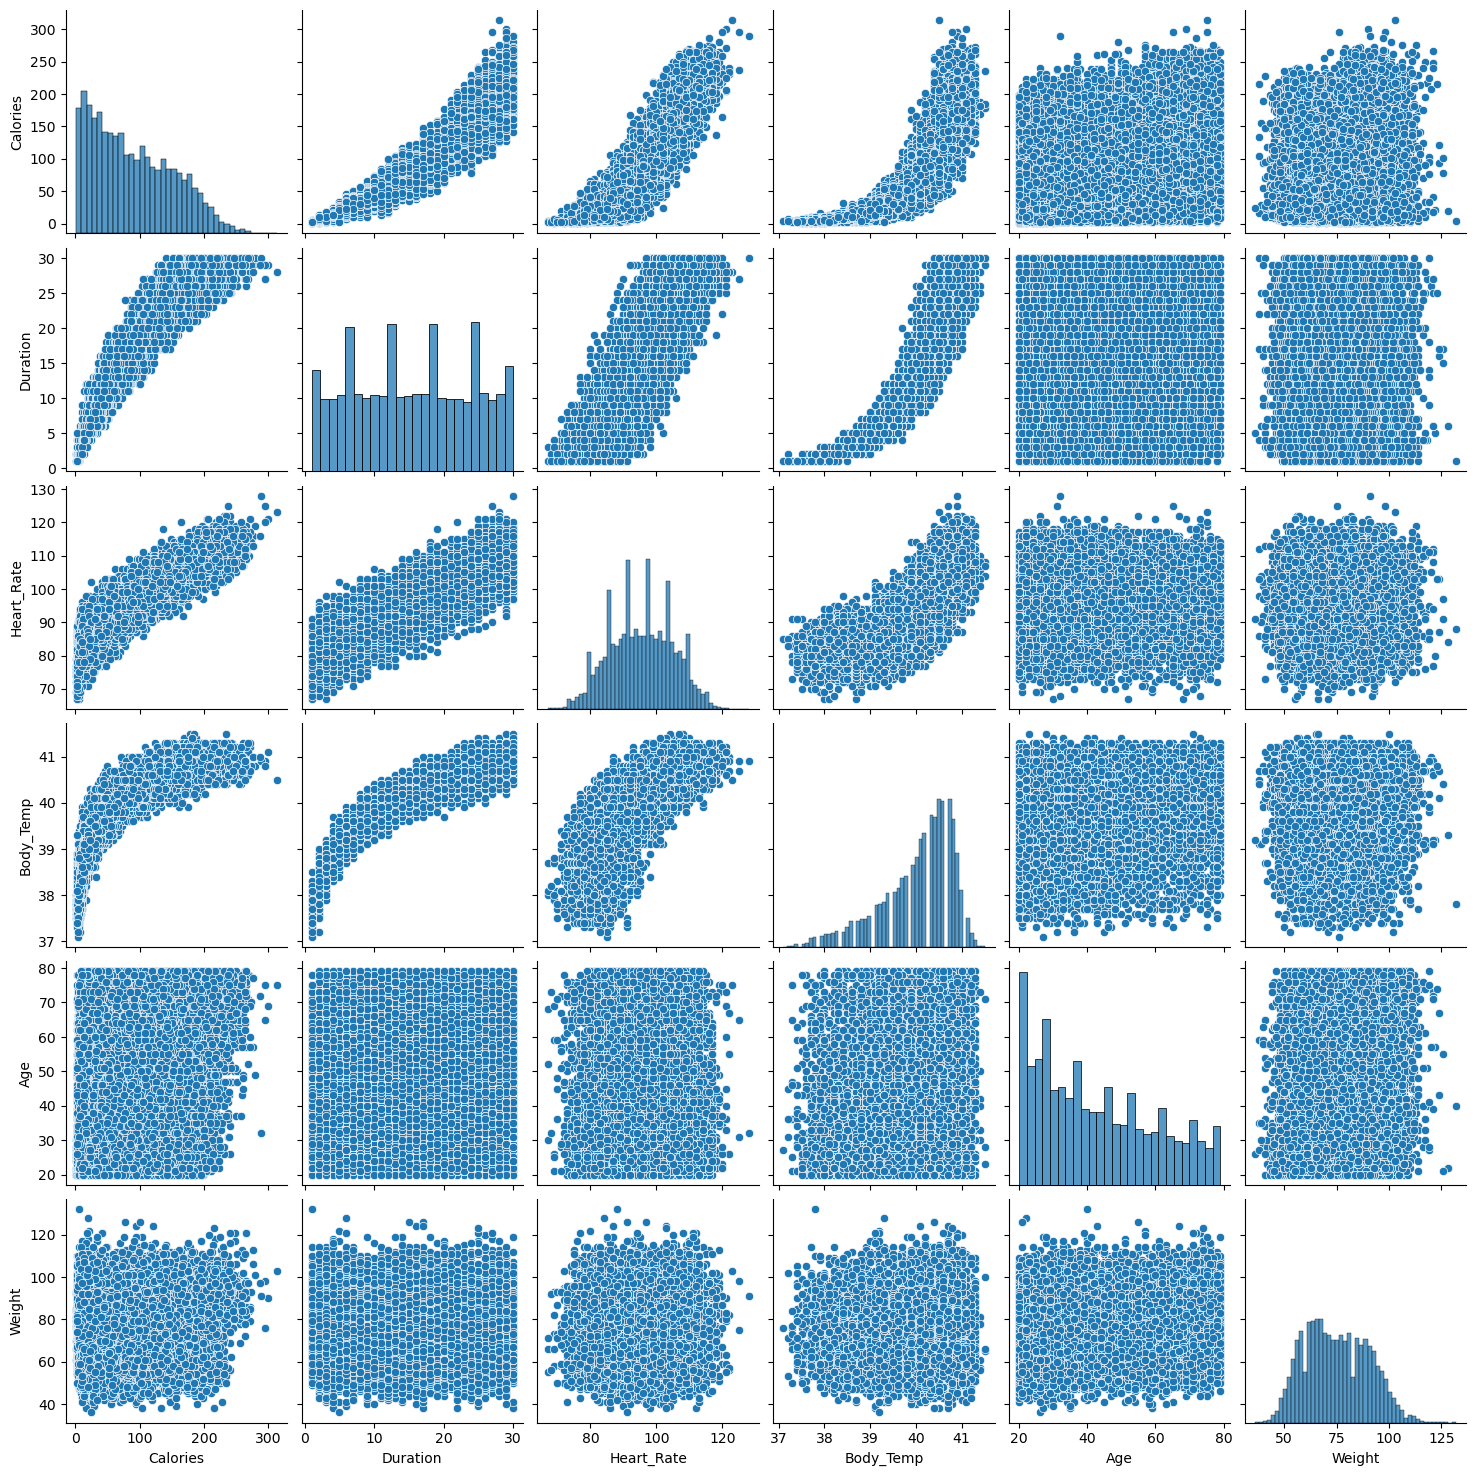

In [53]:
import seaborn as sns
sns.pairplot(df, vars=["Calories", "Duration", "Heart_Rate", "Body_Temp", "Age", "Weight"])
plt.show()

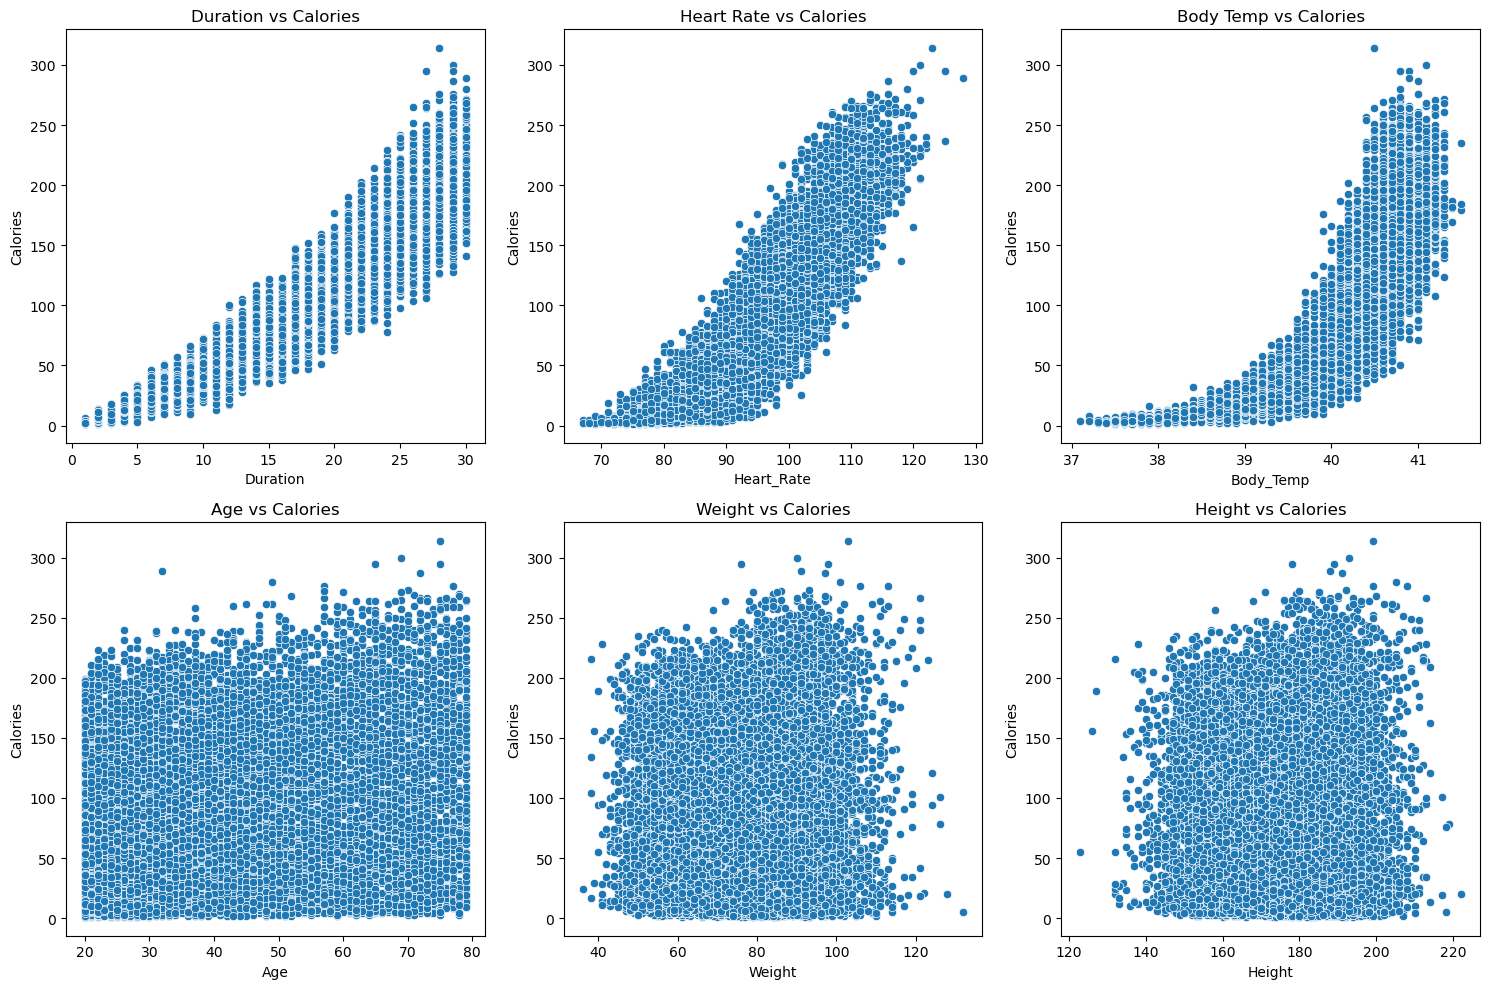

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(x=df["Duration"], y=df["Calories"], ax=axs[0, 0])
axs[0, 0].set_title("Duration vs Calories")

sns.scatterplot(x=df["Heart_Rate"], y=df["Calories"], ax=axs[0, 1])
axs[0, 1].set_title("Heart Rate vs Calories")

sns.scatterplot(x=df["Body_Temp"], y=df["Calories"], ax=axs[0, 2])
axs[0, 2].set_title("Body Temp vs Calories")

sns.scatterplot(x=df["Age"], y=df["Calories"], ax=axs[1, 0])
axs[1, 0].set_title("Age vs Calories")

sns.scatterplot(x=df["Weight"], y=df["Calories"], ax=axs[1, 1])
axs[1, 1].set_title("Weight vs Calories")

sns.scatterplot(x=df["Height"], y=df["Calories"], ax=axs[1, 2])
axs[1, 2].set_title("Height vs Calories")

plt.tight_layout()
plt.show()


## Feature Engineering

In [55]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,0,68,190,94,29,105,40.8,231,26.038781


In [56]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, 100], labels=['Teen', 'Young Adult', 'Middle-Aged', 'Senior'])
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group
0,14733363,0,68,190,94,29,105,40.8,231,26.038781,Senior


In [57]:
df['Workout_Intensity'] = pd.cut(df['Heart_Rate'], bins=[0, 90, 120, 180], labels=['Low', 'Medium', 'High'])
df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group,Workout_Intensity
0,14733363,0,68,190,94,29,105,40.8,231,26.038781,Senior,Medium
1,14861698,1,20,166,60,14,94,40.3,66,21.773842,Young Adult,Medium


In [58]:
df['Calories_per_Min'] = df['Calories'] / df['Duration']
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group,Workout_Intensity,Calories_per_Min
0,14733363,0,68,190,94,29,105,40.8,231,26.038781,Senior,Medium,7.965517
1,14861698,1,20,166,60,14,94,40.3,66,21.773842,Young Adult,Medium,4.714286
2,11179863,0,69,179,79,5,88,38.7,26,24.655910,Senior,Low,5.200000
3,16180408,1,34,179,71,13,100,40.5,71,22.159109,Young Adult,Medium,5.461538
4,17771927,1,27,154,58,10,81,39.8,35,24.456063,Young Adult,Low,3.500000


In [59]:
# Drop User_ID, Age, and Age_Group before training
columns_to_drop = ['User_ID', 'Age']  # Adjust as needed
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Verify that the columns are removed
print(df.columns)  # Should not include 'User_ID', 'Age', or 'Age_Group'


Index(['Gender', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'BMI', 'Age_Group', 'Workout_Intensity',
       'Calories_per_Min'],
      dtype='object')


In [60]:
df.head(4)

,Gender,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group,Workout_Intensity,Calories_per_Min
0,0,190,94,29,105,40.8,231,26.038781,Senior,Medium,7.965517
1,1,166,60,14,94,40.3,66,21.773842,Young Adult,Medium,4.714286
2,0,179,79,5,88,38.7,26,24.655910,Senior,Low,5.200000
3,1,179,71,13,100,40.5,71,22.159109,Young Adult,Medium,5.461538


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Height', 'Weight', 'BMI', 'Calories']] = scaler.fit_transform(df[['Height', 'Weight', 'BMI', 'Calories']])
df

,Gender,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Age_Group,Workout_Intensity,Calories_per_Min
0,0,1.089582,1.265909,29,105,40.8,2.265002,1.086705,Senior,Medium,7.965517
1,1,-0.593726,-0.995458,14,94,40.3,-0.376905,-1.649455,Young Adult,Medium,4.714286
2,0,0.318066,0.268247,5,88,38.7,-1.017367,0.199528,Senior,Low,5.200000
3,1,0.318066,-0.263839,13,100,40.5,-0.296847,-1.402288,Young Adult,Medium,5.461538
4,1,-1.435380,-1.128480,10,81,39.8,-0.873263,0.071317,Young Adult,Low,3.500000
...,...,...,...,...,...,...,...,...,...,...,...
14995,1,1.299996,0.733822,11,92,40.4,-0.713147,-0.806445,Young Adult,Medium,4.090909
14996,1,-0.663864,-0.662904,6,85,39.2,-1.065401,-0.301389,Young Adult,Low,3.833333
14997,1,-1.084691,-1.128480,16,90,40.1,-0.232801,-0.899943,Middle-Aged,Low,4.687500
14998,0,1.299996,1.465441,2,84,38.3,-1.257540,1.088108,Senior,Low,5.500000


In [63]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

 Checking for missing values...

Gender              0
Height              0
Weight              0
Duration            0
Heart_Rate          0
Body_Temp           0
Calories            0
BMI                 0
Calories_per_Min    0
dtype: int64

 Generating correlation heatmap...



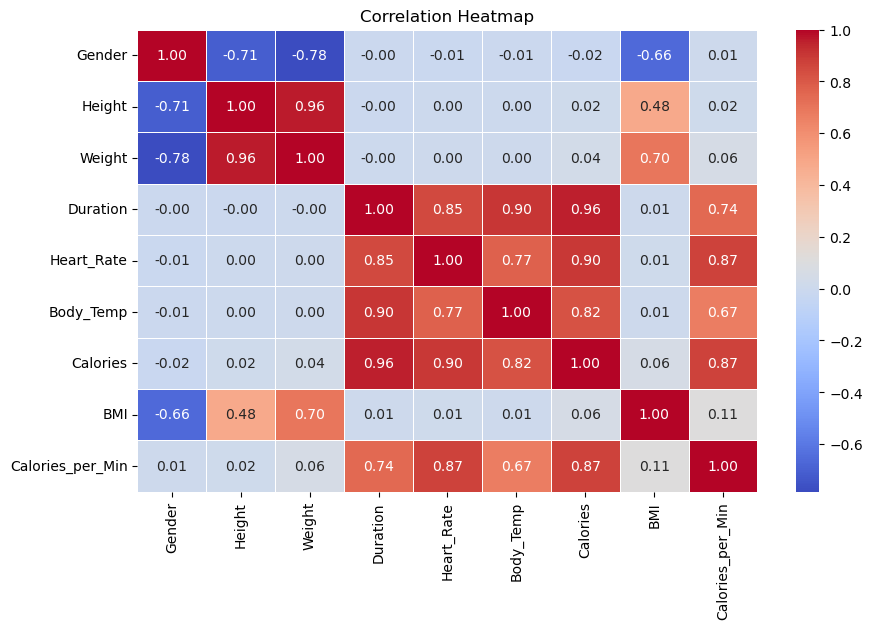


 Features with high correlation (> 0.85) to be dropped: {'Weight', 'Heart_Rate', 'Calories_per_Min', 'Body_Temp', 'Calories'}

 Final dataset after removing correlated features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    15000 non-null  int64  
 1   Height    15000 non-null  float64
 2   Duration  15000 non-null  int64  
 3   BMI       15000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 468.9 KB
None


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Check for missing values
print(" Checking for missing values...\n")
missing_values = df_numeric.isnull().sum()
print(missing_values)

#  Compute and display correlation heatmap
print("\n Generating correlation heatmap...\n")
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#  Identify highly correlated features (correlation > 0.85)
correlation_threshold = 0.85
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("\n Features with high correlation (> 0.85) to be dropped:", highly_correlated_features)

#  Drop highly correlated features
df_cleaned = df_numeric.drop(columns=highly_correlated_features)

#  Display final dataset info
print("\n Final dataset after removing correlated features:")
print(df_cleaned.info())


## Dropping Features with High Correlation

#### When two or more variables are highly correlated, it can cause problems in the model, such as:
#### 1. **Multicollinearity**: The model gets confused because it can't tell which variable is influencing the outcome.
#### 2. **Overfitting**: The model might fit too closely to the training data, leading to poor performance on new data.

#### By removing highly correlated variables:
#### 1. We make the model more stable and easier to understand.
#### 2. It helps the model generalize better to new, unseen data.
#### 3. It removes unnecessary repetition in the data, making the model simpler and faster.

#### To find highly correlated variables, we can use:
#### - **Correlation Matrix**: Shows how closely related variables are.
#### - **Variance Inflation Factor (VIF)**: Helps to check if a variable is highly influenced by others.


#  Data Splitting

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('Calories', axis=1)  # Assuming Calories is the target variable
y = df['Calories']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Encoding

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initialize the encoder (with sparse_output=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply the encoder to the Age_Group column
X_encoded = encoder.fit_transform(X[['Age_Group']])

# Convert the encoded result into a DataFrame and concatenate with the rest of the features
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Age_Group']))
X = pd.concat([X.drop(columns=['Age_Group']), encoded_df], axis=1)


In [67]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Age_Group' column
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])


In [69]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Workout_Intensity' if it's ordinal
label_encoder = LabelEncoder()
df['Workout_Intensity'] = label_encoder.fit_transform(df['Workout_Intensity'])

# Apply OneHotEncoding to 'Age_Group' since it's a categorical variable (nominal)
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)

# Now both 'Workout_Intensity' and 'Age_Group' are encoded, and df is ready for the model.


# Model Training

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data
X = df.drop('Calories', axis=1)  # Features (exclude target)
y = df['Calories']  # Target variable (Calories)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 0.10475634234312993
Mean Squared Error (MSE): 0.020743080277024654
R-squared: 0.9799517020252396


# Model Evaluation Results:
#### - Mean Absolute Error (MAE): 0.10475634234312993
####   This means, on average, the model's predictions are off by approximately 0.085 units. 
####   The lower the MAE, the better the model's predictions.
####
#### - Mean Squared Error (MSE): 0.020743080277024654
####   The MSE indicates the average squared difference between the predicted and actual values. 
####   A smaller MSE shows that the model is predicting well with fewer large errors.
####
#### - R-squared (R²):0.9799517020252396
####   This indicates that 97.99% of the variation in the target variable is explained by the model.
####   A high R-squared value suggests a very strong fit and that the model is doing an excellent job of predicting the target variable.
####
#### In summary, the model shows strong performance with a low error and high explanatory power, 
#### making it highly accurate for prediction purposes.


In [71]:
y_pred = model.predict(X_test)
y_pred

array([ 1.31023239,  1.67809049, -0.43883921, ...,  0.58763632,
       -1.15421067,  1.76363448])

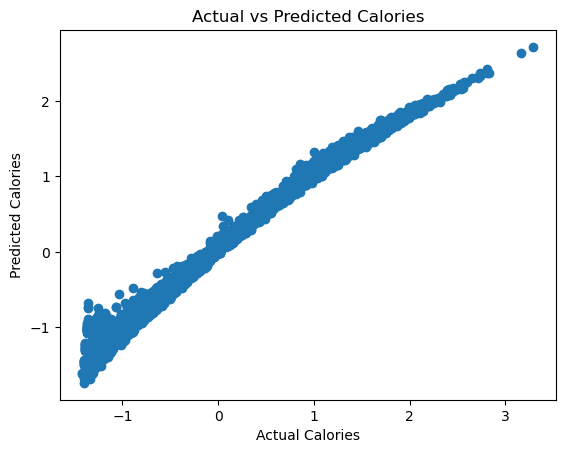

In [256]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()


# END